In [1]:
import pandas as pd
import baseline_model as mb

In [2]:
train_data = pd.read_csv('/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/Data/0.4/London_UTD19_train_Sniper_0.csv')
test_data = pd.read_csv('/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/Data/0.4/London_UTD19_test_Sniper_0.csv')

In [3]:
mb.train_random_baseline_models(train_data, '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/models/baseline_0_4')

In [4]:
models_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/models/baseline_0_4'

In [8]:
predictions = mb.get_random_baseline_prediction(models_path, 0)
predictions

,interval,traffic,detid
0,0,14,EAST_N05/095c1
12,3600,27,EAST_N05/095c1
24,7200,24,EAST_N05/095c1
36,10800,21,EAST_N05/095c1
48,14400,14,EAST_N05/095c1
...,...,...,...
228,68400,99,CNTR_N01/353j1
240,72000,49,CNTR_N01/353j1
252,75600,59,CNTR_N01/353j1
264,79200,73,CNTR_N01/353j1


In [5]:
evaluation = mb.evaluate_random_baseline_models(test_data, models_path)
evaluation

,Average MAE,Average MSE
0,17.323077,609.125857


In [6]:
import matplotlib.pyplot as plt

In [9]:
one_sensor_data = predictions[predictions['detid'] == 'EAST_N05/095c1'] 
X_pred = one_sensor_data.interval
y_pred = one_sensor_data.traffic

In [10]:
train_data_sensor = train_data[train_data['detid'] == 'EAST_N05/095c1']
X_train = train_data_sensor.interval
y_train = train_data_sensor.traffic

In [11]:
test_data_sensor = test_data[test_data['detid'] == 'EAST_N05/095c1']
X_test = test_data_sensor.interval
y_test = test_data_sensor.traffic

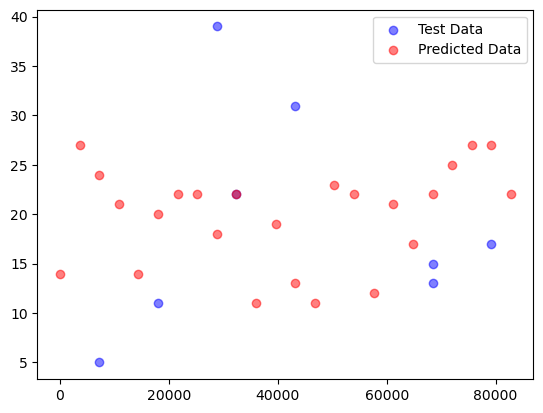

In [12]:
# plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Test Data")    
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Test Data")    
plt.scatter(X_pred, y_pred, color="red", alpha=0.5, label="Predicted Data") 
plt.legend() 

In [13]:
predictions

,interval,traffic,detid
0,0,14,EAST_N05/095c1
12,3600,27,EAST_N05/095c1
24,7200,24,EAST_N05/095c1
36,10800,21,EAST_N05/095c1
48,14400,14,EAST_N05/095c1
...,...,...,...
228,68400,99,CNTR_N01/353j1
240,72000,49,CNTR_N01/353j1
252,75600,59,CNTR_N01/353j1
264,79200,73,CNTR_N01/353j1


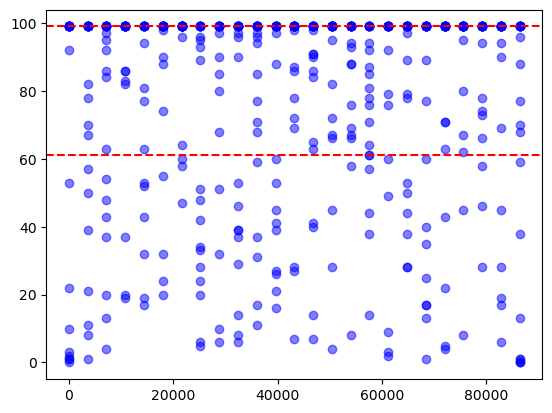

In [14]:
train_show_sensor = train_data[train_data.detid == 'EAST_N04/097c1']
x_show = train_show_sensor.interval
y_show = train_show_sensor.traffic
Q1 = y_show.quantile(0.25)
Q3 = y_show.quantile(0.75)

plt.scatter(x_show, y_show, color="blue", alpha=0.5, label="Test Data")
plt.axhline(y=Q1, color='red', linestyle='--')    
plt.axhline(y=Q3, color='red', linestyle='--')
 

In [15]:
train_data.traffic.mean()

29.173848556753672

In [17]:
Q1_all_sensors = train_data.traffic.quantile(0.25)
Q3_all_sensors = train_data.traffic.quantile(0.72)
print(Q1_all_sensors)
print(Q3_all_sensors)


6.0
39.0
